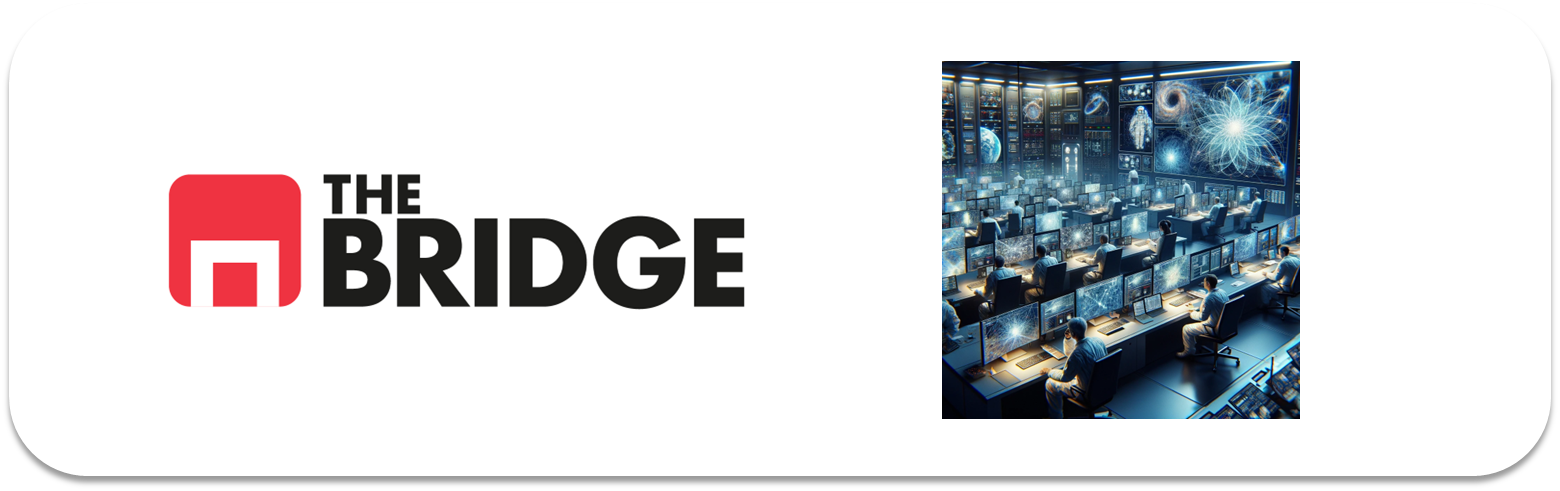

## PRACTICA OBLIGATORIA: **Transfer Learning y Fine Tuning**

* La práctica obligatoria de esta unidad consiste en un repetir el ejercicio de construcción de un modelo de clasificación de paisajes pero usando un modelo preentrenado. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [3]:
import tensorflow as tf

# Configurar la GPU antes de inicializar TensorFlow
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)


"""#limita el uso de la GPU durante la creacion del tensor
# Configurar el porcentaje de la memoria GPU a utilizar
gpu_memory_fraction = 0.5  # Por ejemplo, limitar a 50%

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Limitar la memoria GPU utilizada
        for gpu in gpus:
            tf.config.experimental.set_virtual_device_configuration(
                gpu,
                [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=int(gpu_memory_fraction * 1024))]
            )
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        print(e)"""

'#limita el uso de la GPU durante la creacion del tensor\n# Configurar el porcentaje de la memoria GPU a utilizar\ngpu_memory_fraction = 0.5  # Por ejemplo, limitar a 50%\n\ngpus = tf.config.experimental.list_physical_devices(\'GPU\')\nif gpus:\n    try:\n        # Limitar la memoria GPU utilizada\n        for gpu in gpus:\n            tf.config.experimental.set_virtual_device_configuration(\n                gpu,\n                [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=int(gpu_memory_fraction * 1024))]\n            )\n        logical_gpus = tf.config.experimental.list_logical_devices(\'GPU\')\n        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")\n    except RuntimeError as e:\n        print(e)'

In [6]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils import shuffle
from tensorflow.keras.applications.resnet_v2 import ResNet50V2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras.applications.resnet_v2 import ResNet50V2, decode_predictions, preprocess_input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Model
import pandas as pd
# ignore warnings
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
import pandas as pd
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping

### Objetivo del ejercicio

Comparar una red convolucional hecha ad-hoc frente a los modelos preentrenados y ajustados con fine tuning y transfer learning. Para ello emplea el dataset de paisajes del conjunto de ejercicios de la unidad anterior.


### Se pide

1. Preparar los datos del modelo y las funciones de visualización, copia para ello todo lo que necesites de las soluciones del ejercicio de clasificación de paisajes de la unidad anterior.

2. Escoger entre uno de los modelos VGG-19, InceptionV3 y MobileNetV2 (todos en https://keras.io/api/applications/) (Se aconseja este último si no tenemos un ordenador muy potente). Si no te haces con estos puedes recurrir a la ResNetV50.

4. Hacer un transfer-learning con una cabeza de como mucho 2 capas densas ocultas y una de salida. Mostrar la evaluación contra test, el report de clasificación y la matriz de confusión.

5. Hacer un fine-tuning con la misma cabeza diseñada en el punto anterior. Mostrar la evaluación contra test, el report de clasificación y la matriz de confusión.

6. Comparar los resultados con los obtenidos con la red convolucional del ejercicio mencionado.

EXTRA:
- Repetir el transfer learning empleando aumentado de imágenes.



In [5]:
TRAIN_PATH = './data/seg_train'
TEST_PATH = './data/seg_test'
PRED_PATH = './data/seg_pred'

In [6]:
# Cargamos cada imagen y su etiqueta
X_train = []
y_train = []
#iteramos y listamos directorios y subdiretorios del pth
for category in os.listdir(TRAIN_PATH):
    for file in os.listdir(os.path.join(TRAIN_PATH, category)):
        img = plt.imread(os.path.join(TRAIN_PATH, category, file))
        img = cv2.resize(img, (224, 224))
        X_train.append(img)
        y_train.append(category)


In [7]:
# Cargamos los datos de test
X_test = []
y_test = []

for category in os.listdir(TEST_PATH):
    for file in os.listdir(os.path.join(TEST_PATH, category)):
        img = plt.imread(os.path.join(TEST_PATH, category, file))#contrimos la ruta completa a cada categoria y file
        img = cv2.resize(img, (224, 224))
        X_test.append(img)
        y_test.append(category)


In [8]:
# Cargamos los datos de test
y_pred=[]
img = cv2.resize(img, (224, 224))


for category in os.listdir(PRED_PATH): 
    y_pred.append(img)


In [9]:
# Convertir listas de características de entrenamiento a tensores de numpy
X_train = np.array(X_train)

# Convertir listas de etiquetas de entrenamiento a un array de numpy o a una lista de enteros
label_to_index_train = {label: i for i, label in enumerate(np.unique(y_train))}
y_train = np.array([label_to_index_train[label] for label in y_train])

# Convertir listas de características de prueba a tensores de numpy
X_test = np.array(X_test)

# Convertir listas de etiquetas de prueba a un array de numpy o a una lista de enteros
label_to_index_test = {label: i for i, label in enumerate(np.unique(y_test))}
y_test = np.array([label_to_index_test[label] for label in y_test])

Text(0.5, 1.0, '0')

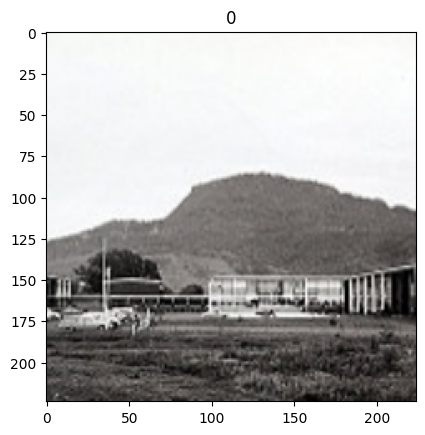

In [10]:
#ahora empezaemos atrabajar con train y test

plt.imshow(X_train[0])
plt.title(y_train[0])




Text(0.5, 1.0, '0')

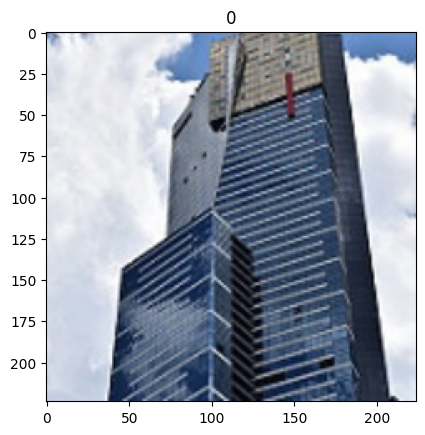

In [11]:
plt.imshow(X_test[0])
plt.title(y_test[0])

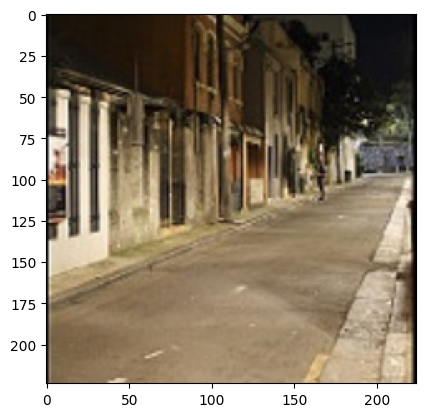

In [12]:
plt.imshow(y_pred[0])

In [13]:
pd.Series(y_train).value_counts(normalize=True)

3    0.178994
2    0.171298
5    0.169731
4    0.162035
1    0.161821
0    0.156121
dtype: float64

6. Hacer un transfer-learning con una cabeza de como mucho 2 capas densas ocultas y una de salida. Mostrar la evaluación contra test, el report de clasificación y la matriz de confusión.



TRANSFER-LERNING

In [14]:

def prepare_model_transfer(base_model):
    # Congelar las capas
    for layer in base_model.layers:
      layer.trainable = False
    
    x = base_model.output
    
    # Capa densa con 300 neuronas
    x = layers.Dense(600, activation='relu')(x)
    
    # Capa densa con 300 neuronas
    x = layers.Dense(600, activation='relu')(x)
    
    # Capa densa con 300 neuronas
    x = layers.Dense(600, activation='relu')(x)

    # Capa densa con 300 neuronas
    x = layers.Dense(600, activation='relu')(x)
    
    # Capa densa con 300 neuronas
    x = layers.Dense(600, activation='relu')(x)
 
    # Capa final de salida con 6 neuronas y activación softmax 
    x = output = layers.Dense(6, activation='softmax')(x)  
    
    # Crear el modelo
    model_transfer = tf.keras.Model(inputs=base_model.input, outputs=output)
      
    # Compilar el modelo
    model_transfer.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

          
    return model_transfer

In [15]:
# Cargar el modelo base (por ejemplo, VGG19)
base_model = tf.keras.applications.VGG19(include_top=1, weights='imagenet', input_shape=(224, 224, 3))

# Preparar el modelo
model = prepare_model_transfer(base_model)

# Observar la arquitectura del modelo
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [16]:
print(len(X_test))
print(len(y_test))

3000
3000


In [17]:
resultado = model.evaluate(X_test, y_test,batch_size=32, verbose=1)

# Imprimir la pérdida y la precisión (accuracy) obtenida en el conjunto de prueba
print("Pérdida en el conjunto de prueba:", resultado[0])
print("Precisión en el conjunto de prueba:", resultado[1])

94/94 [==============================] - 24s 135ms/step - loss: 1.7918 - accuracy: 0.2197
Pérdida en el conjunto de prueba: 1.7917983531951904
Precisión en el conjunto de prueba: 0.21966665983200073


vamos a crar un generador para tener mas imagenes haber si cionseguimos mejores resultados

In [18]:


train_path = './data/seg_train'
test_path = './data/seg_test'
pred_path = './data/seg_pred'

In [19]:
# generador de imágenes para el conjunto de entrenamiento
train_datagen = ImageDataGenerator(
    rescale=1./255,     # Reescalar los valores de píxeles a un rango de 0 a 1
    rotation_range=20,  # Rotar aleatoriamente las imágenes en un rango de 20 grados
    width_shift_range=0.1,  # Desplazar horizontalmente las imágenes aleatoriamente
    height_shift_range=0.1, # Desplazar verticalmente las imágenes aleatoriamente
    shear_range=0.2,     # Aplicar deformaciones de corte aleatorias
    zoom_range=0.2,      # Aplicar aleatoriamente un zoom a las imágenes
    horizontal_flip=True,  # Voltear horizontalmente las imágenes aleatoriamente
    fill_mode='nearest'     # Estrategia para rellenar píxeles nuevos creados
)


In [20]:
#  generador de imágenes para el conjunto de prueba 
test_datagen = ImageDataGenerator(rescale=1./255)
batch_size = 32

# Crear generadores de flujo de datos
train_generador = train_datagen.flow_from_directory(
    train_path,          
    target_size=(224, 224),  # (altura, anchura)
    batch_size=batch_size,     
    class_mode='categorical'
)

test_generador = test_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode="categorical"
)


Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [21]:
images=[]
labels=[]

#aumento el tamaño de pruebas pq tengo las mismas que antes
num_samples_test = test_generador.samples

# Obtener más muestras de prueba generando más lotes de imágenes
for i in range(10):  # Generar 10 lotes adicionales 
    batch = test_generador.next()

images.extend(batch[0])
labels.extend(batch[1])

In [22]:
# Convertir las listas en arreglos numpy
images_array = np.array(images)
labels_array = np.array(labels)

In [23]:
labels_array.shape

(32, 6)

In [24]:
# Reformatear las etiquetas para que tengan la forma (32,)
labels_array_refor = np.argmax(labels_array, axis=1)
labels_array_refor.shape

(32,)

In [25]:
resultado = model.evaluate(images_array, labels_array_refor,batch_size=32, verbose=1)

# Imprimir la pérdida y la precisión (accuracy) obtenida en el conjunto de prueba
print("Pérdida en el conjunto de prueba:", resultado[0])
print("Precisión en el conjunto de prueba:", resultado[1])

1/1 [==============================] - 0s 432ms/step - loss: 1.7922 - accuracy: 0.1250
Pérdida en el conjunto de prueba: 1.7922050952911377
Precisión en el conjunto de prueba: 0.125


ENTRENAMOS EL MODELO 

In [27]:
model = prepare_model_transfer(base_model)

# Compila tu modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

with tf.device('/CPU:0'):
    # Entrena tu modelo y guarda el historial
    history = model.fit(X_train, y_train, epochs=1, batch_size=32)



439/439 [==============================] - 1669s 4s/step - loss: 0.6497 - accuracy: 0.7294


ME DABA UN CONFLICTO LA GPU Y TUVE Q PONERLO EN CPU, Y LO DEJE POR LA NOCHEW..... MALA SUERTE QUE DIO UN FALLO TONTO

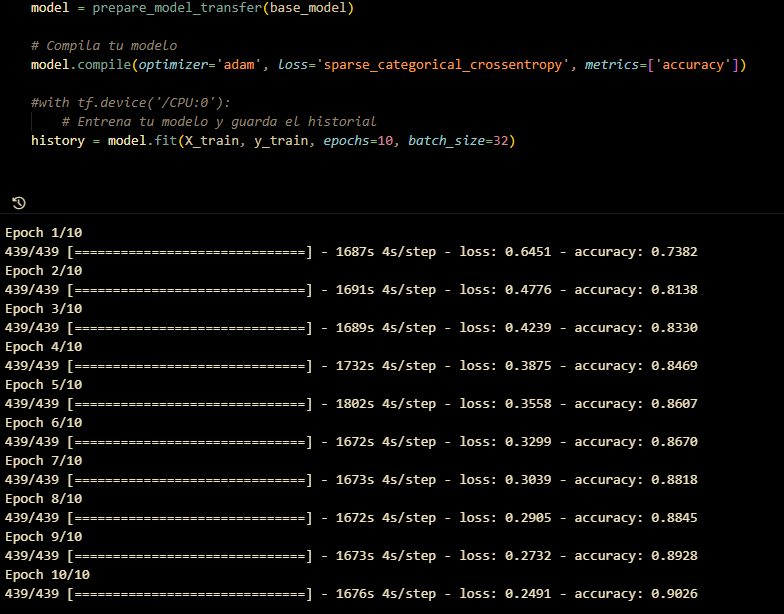

In [39]:

y_pred = [ np.argmax(prediction) for prediction in model.predict(X_test)]
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.88      0.82       437
           1       0.93      0.96      0.94       474
           2       0.73      0.76      0.75       553
           3       0.81      0.69      0.74       525
           4       0.85      0.88      0.87       510
           5       0.89      0.82      0.85       501

    accuracy                           0.83      3000
   macro avg       0.83      0.83      0.83      3000
weighted avg       0.83      0.83      0.82      3000



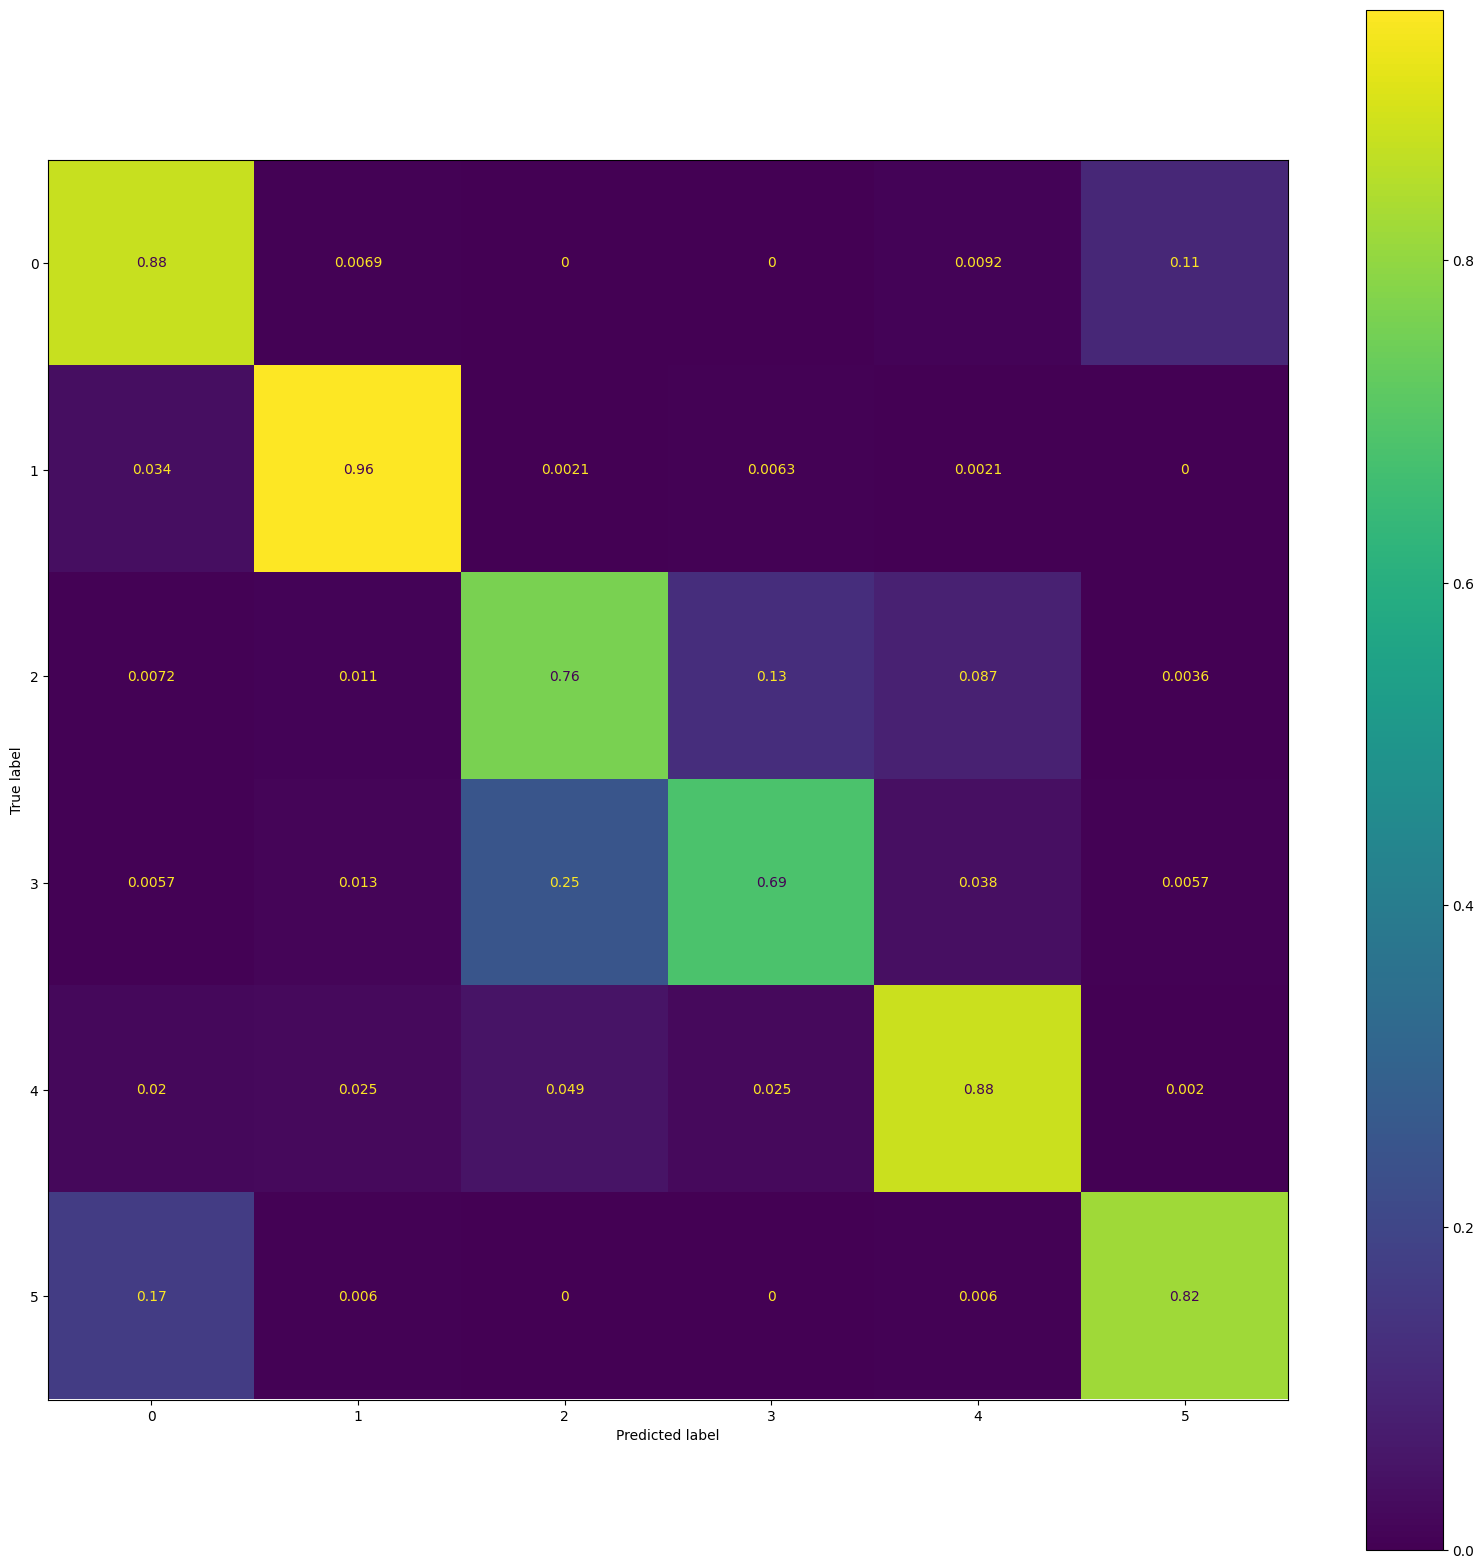

In [40]:
fig,axs = plt.subplots(1,1,figsize = (20,20))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize = "true", ax = axs)

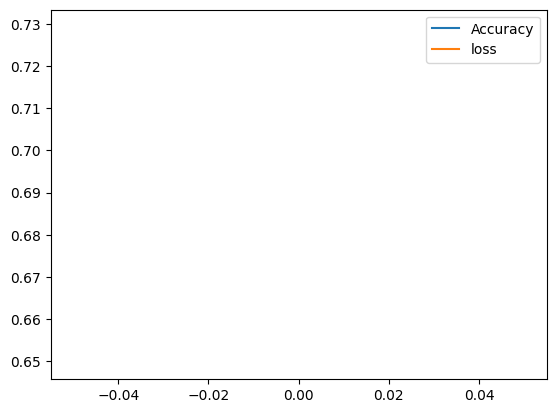

In [31]:

# Representamos el objeto history
history_df = pd.DataFrame(history.history)
plt.plot(history_df['accuracy'], label = 'Accuracy')
plt.plot(history_df['loss'], label = 'loss')

plt.legend();

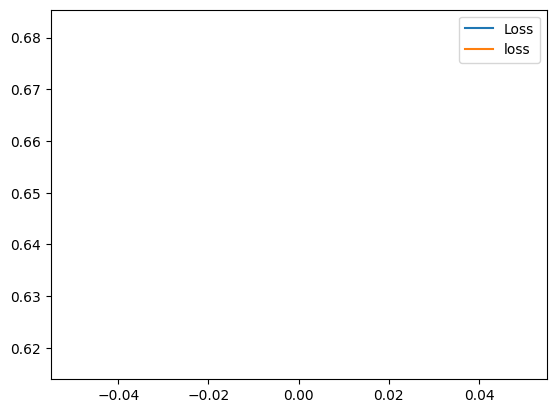

In [33]:
plt.plot(history_df['loss'], label = 'Loss')
plt.plot(history_df['loss'], label = 'loss')

plt.legend();

5. Hacer un fine-tuning con la misma cabeza diseñada en el punto anterior. Mostrar la evaluación contra test, el report de clasificación y la matriz de confusión.



FINE-TUNING

In [34]:
def prepare_model_tuning(base_model):

    # Congelar las capas
    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output

    # Capa densa con 300 neuronas
    x = layers.Dense(300, activation='relu')(x)

    x = layers.Dropout(rate = 0.5)(x)

    # Capa densa con 300 neuronas
    x = layers.Dense(300, activation='relu')(x)

    x = layers.Dropout(rate = 0.5)(x)

    # Capa densa con 300 neuronas
    x = layers.Dense(300, activation='relu')(x)

    # Capa final de salida con 13 neuronas y activación softmax
    x= output= layers.Dense(6, activation='softmax')(x)

    # Crear el modelo
    model_fine_tuning = tf.keras.Model(inputs=base_model.input, outputs=output)
    
    # Compilar el modelo con el optimizador Adam y la función de pérdida SparseCategoricalCrossentropy y la métrica accuracy.   
    model_fine_tuning.compile(optimizer = "adam", loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

    return model



In [35]:
# Cargar el modelo base (por ejemplo, VGG19)
base_model = tf.keras.applications.VGG19(include_top=1, weights="imagenet", input_shape=(224,224,3), classifier_activation="softmax")

# Preparar el modelo
model= prepare_model_tuning(base_model)

# Observar la arquitectura del modelo
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [ ]:
resultado = model.evaluate(X_test, y_test,batch_size=32, verbose=1)

# Imprimir la pérdida y la precisión (accuracy) obtenida en el conjunto de prueba
print("Pérdida en el conjunto de prueba:", resultado[0])
print("Precisión en el conjunto de prueba:", resultado[1])

94/94 [==============================] - 12s 124ms/step - loss: 1.7918 - accuracy: 0.2110
Pérdida en el conjunto de prueba: 1.791815161705017
Precisión en el conjunto de prueba: 0.210999995470047


GENERADOR

In [ ]:
resultado = model.evaluate(images_array, labels_array_refor,batch_size=32, verbose=1)

# Imprimir la pérdida y la precisión (accuracy) obtenida en el conjunto de prueba
print("Pérdida en el conjunto de prueba:", resultado[0])
print("Precisión en el conjunto de prueba:", resultado[1])

1/1 [==============================] - 0s 463ms/step - loss: 1.7918 - accuracy: 0.0000e+00
Pérdida en el conjunto de prueba: 1.7917671203613281
Precisión en el conjunto de prueba: 0.0


ENTRENAMOS EL MODELO

para ver lo que va a tardar

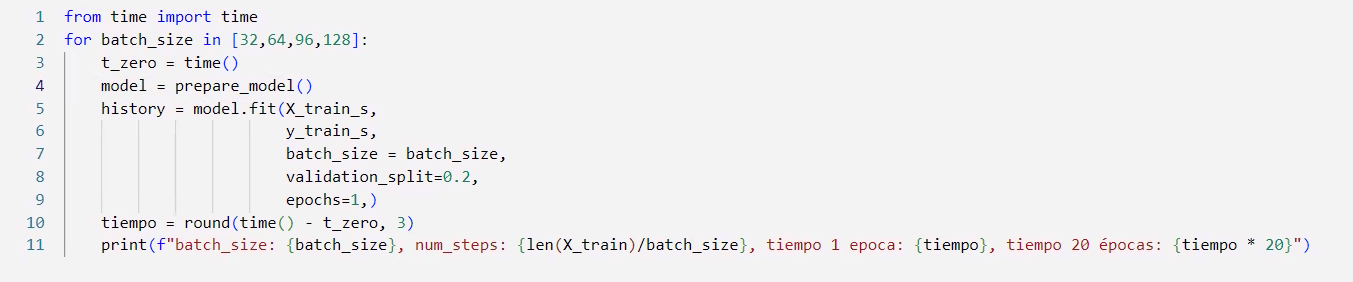

In [36]:
model = prepare_model_tuning(base_model)

# Compila tu modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

with tf.device('/CPU:0'):
    # Entrena tu modelo y guarda el historial
    history = model.fit(X_train, y_train, epochs=1, batch_size=32)

#usamos esta funcion de keras como regulador del overfitting
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5,
                                                  restore_best_weights=True)



439/439 [==============================] - 5421s 12s/step - loss: 0.4975 - accuracy: 0.8130


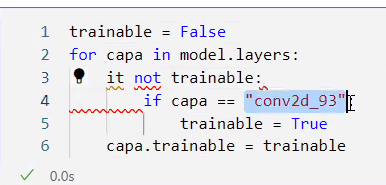

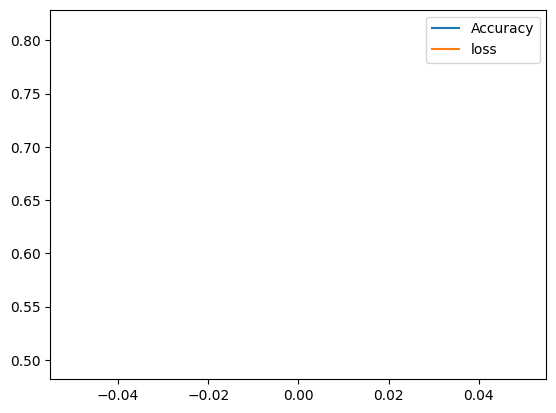

In [37]:
# Representamos el objeto history
history_df = pd.DataFrame(history.history)
plt.plot(history_df['accuracy'], label = 'Accuracy')
plt.plot(history_df['loss'], label = 'loss')

plt.legend();

In [41]:
y_pred = [ np.argmax(prediction) for prediction in model.predict(X_test)]
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.88      0.82       437
           1       0.93      0.96      0.94       474
           2       0.73      0.76      0.75       553
           3       0.81      0.69      0.74       525
           4       0.85      0.88      0.87       510
           5       0.89      0.82      0.85       501

    accuracy                           0.83      3000
   macro avg       0.83      0.83      0.83      3000
weighted avg       0.83      0.83      0.82      3000



NameError: name 'y_test' is not defined

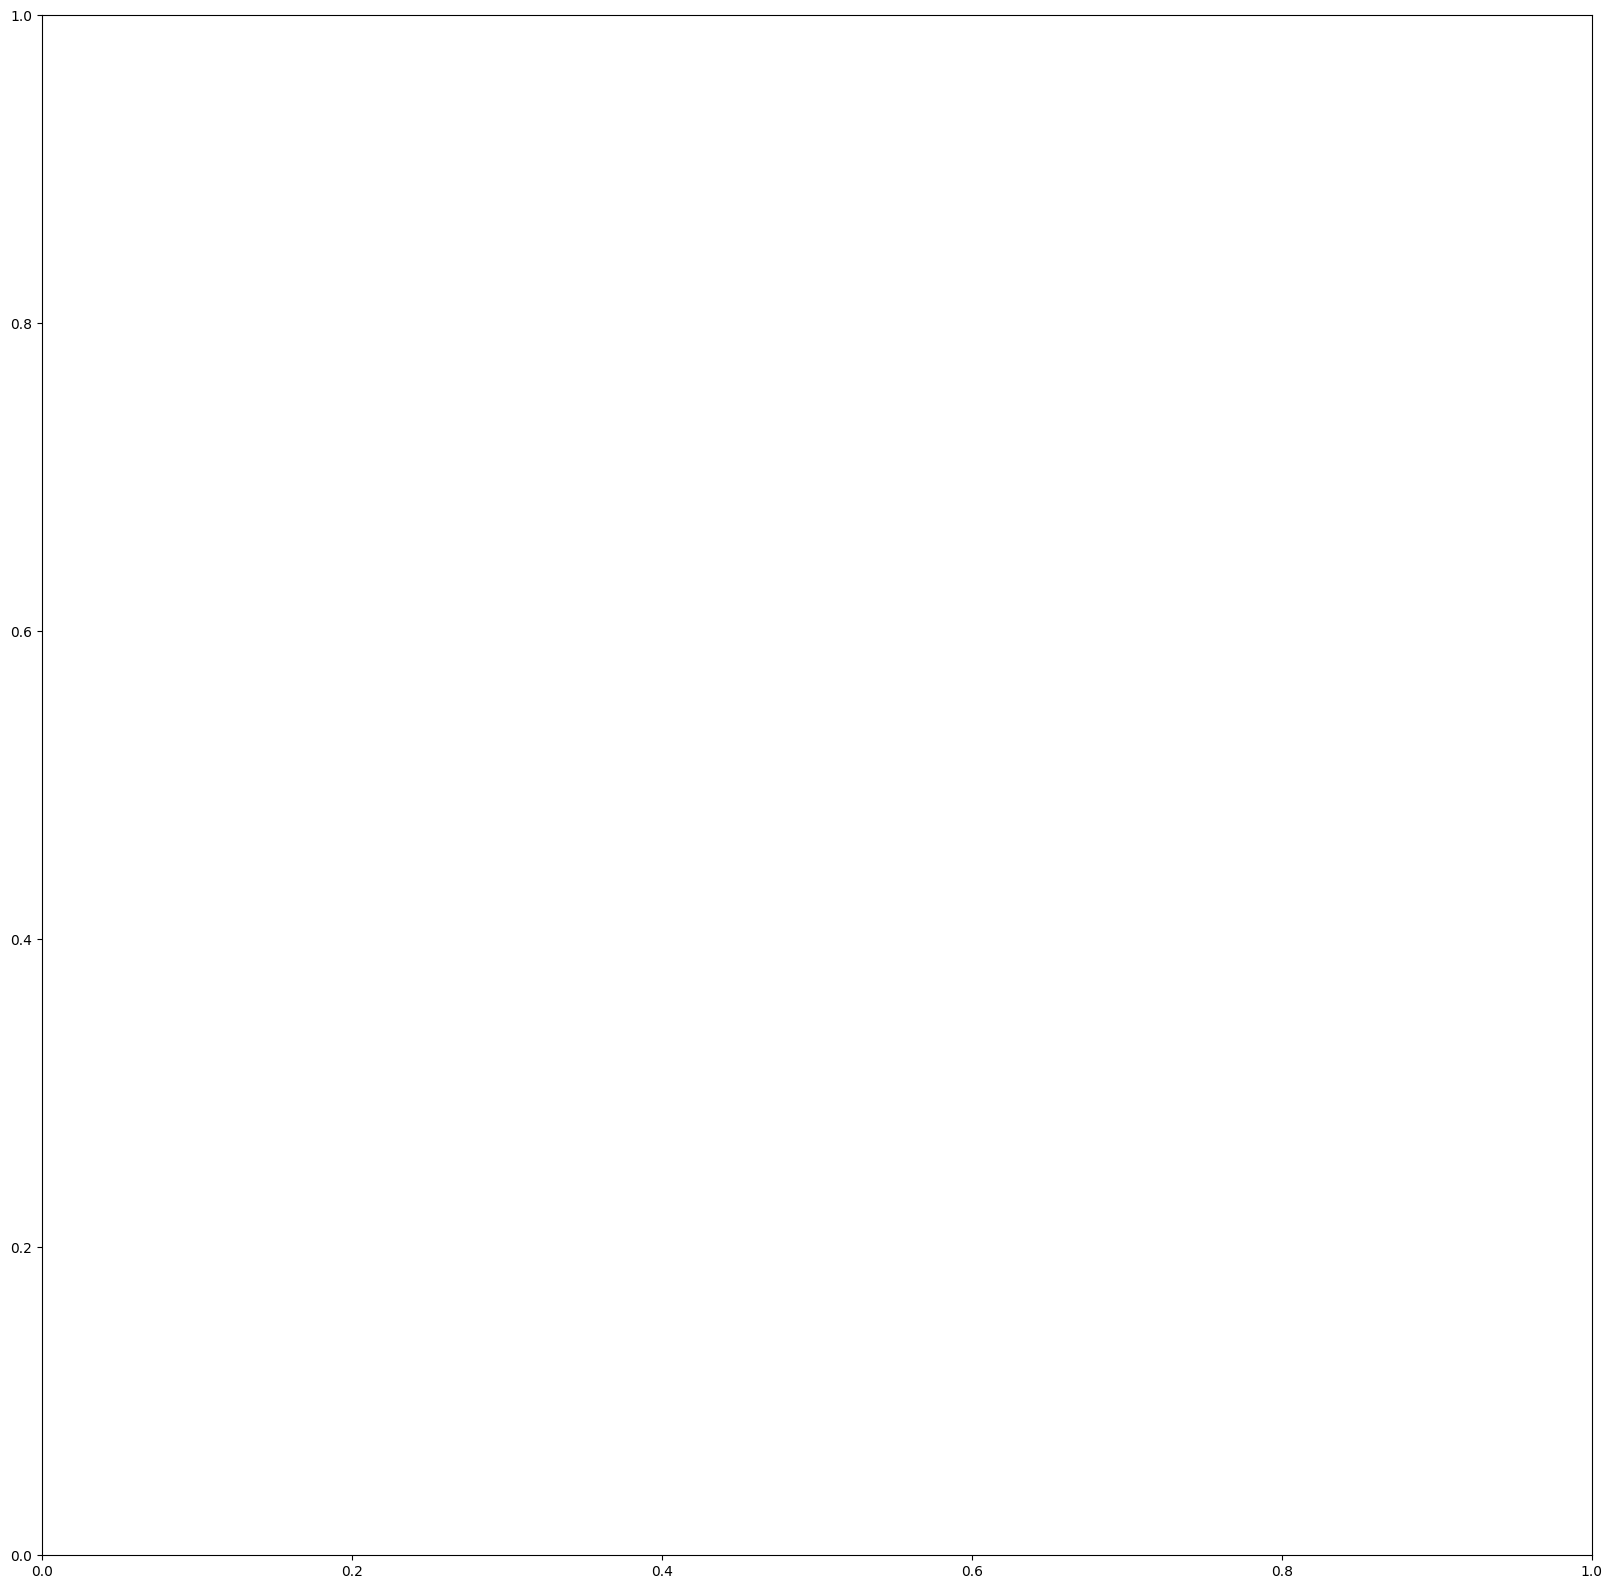

In [7]:
fig,axs = plt.subplots(1,1,figsize = (20,20))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize = "true", ax = axs)

EXTRA CON AUMENTADO DE IMAGENES

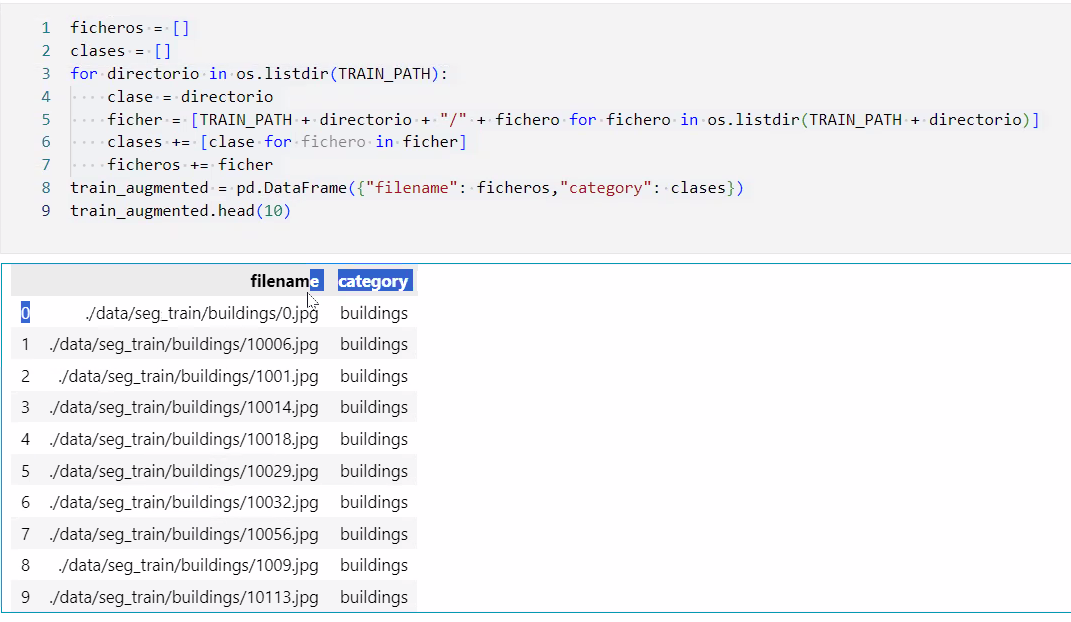

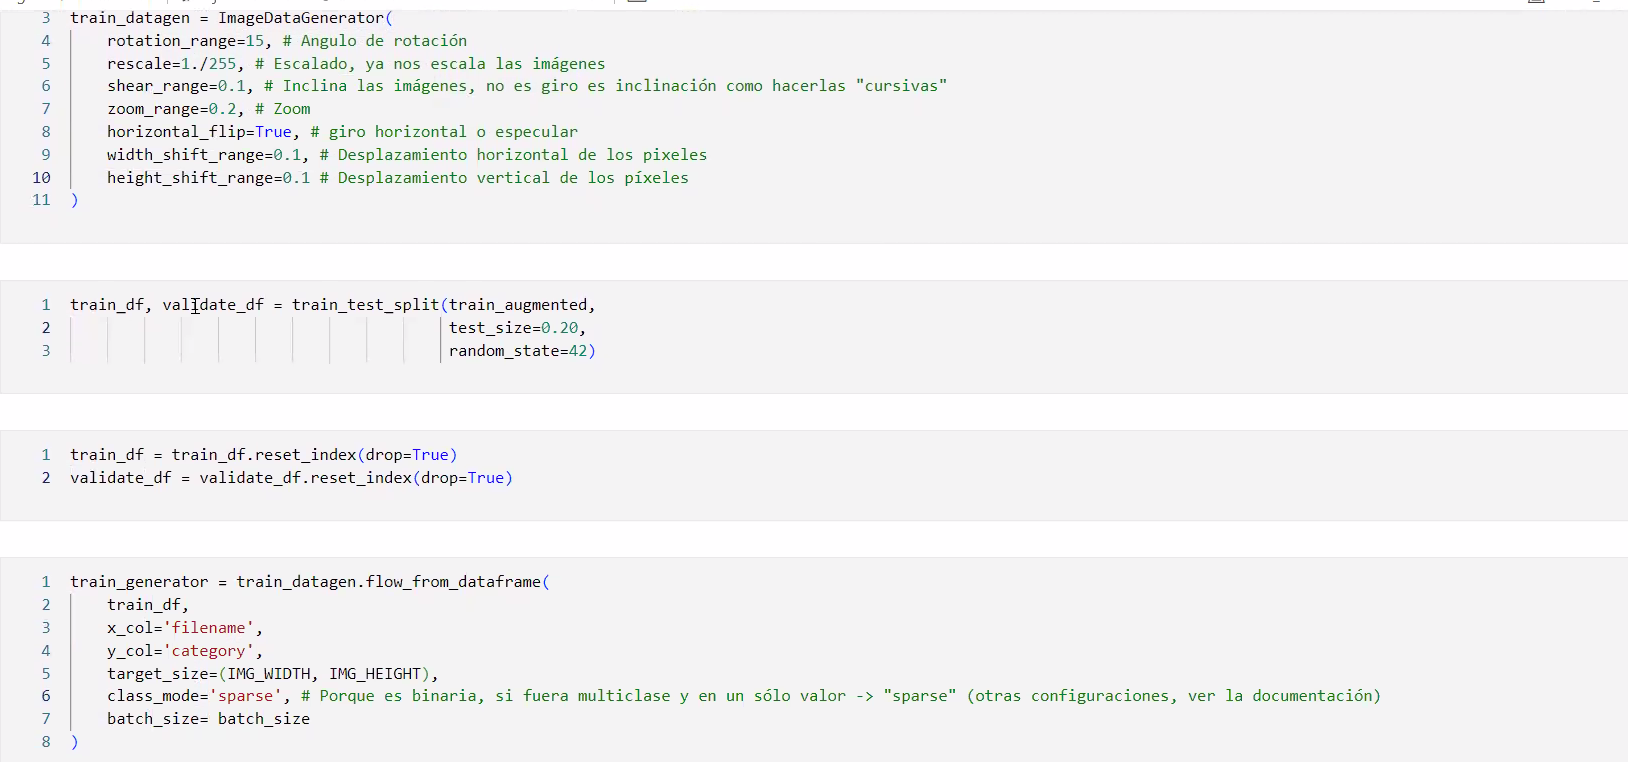

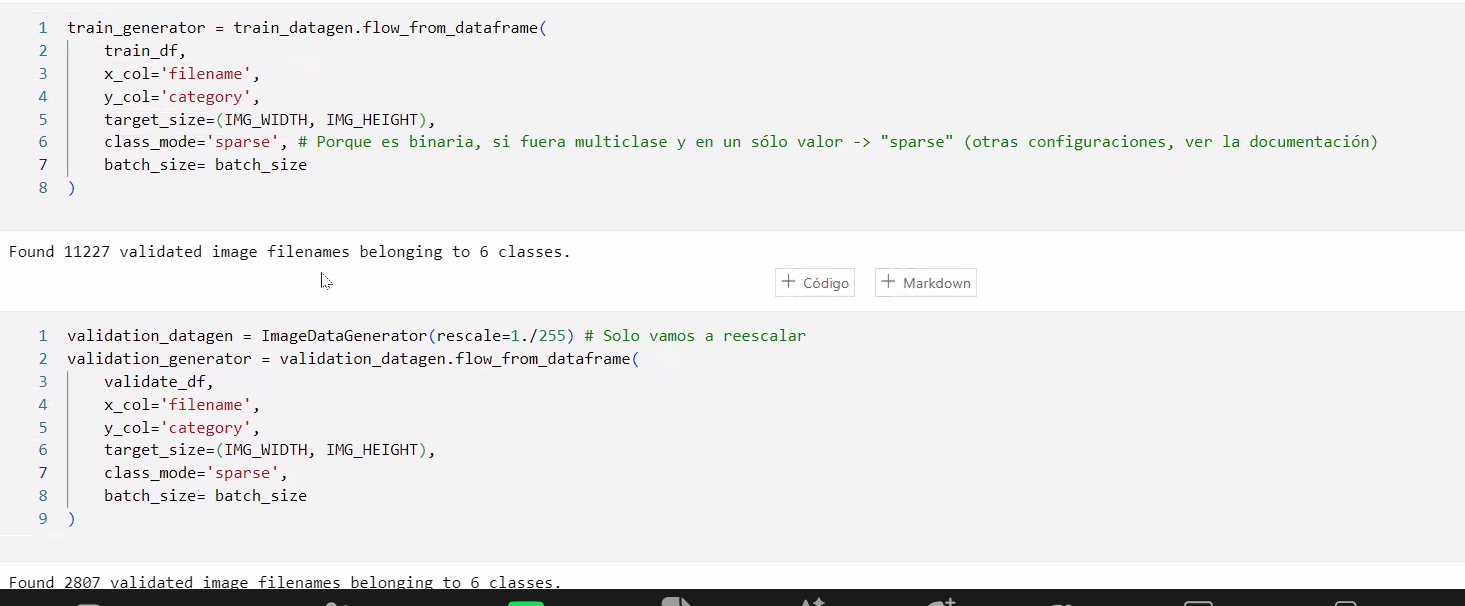

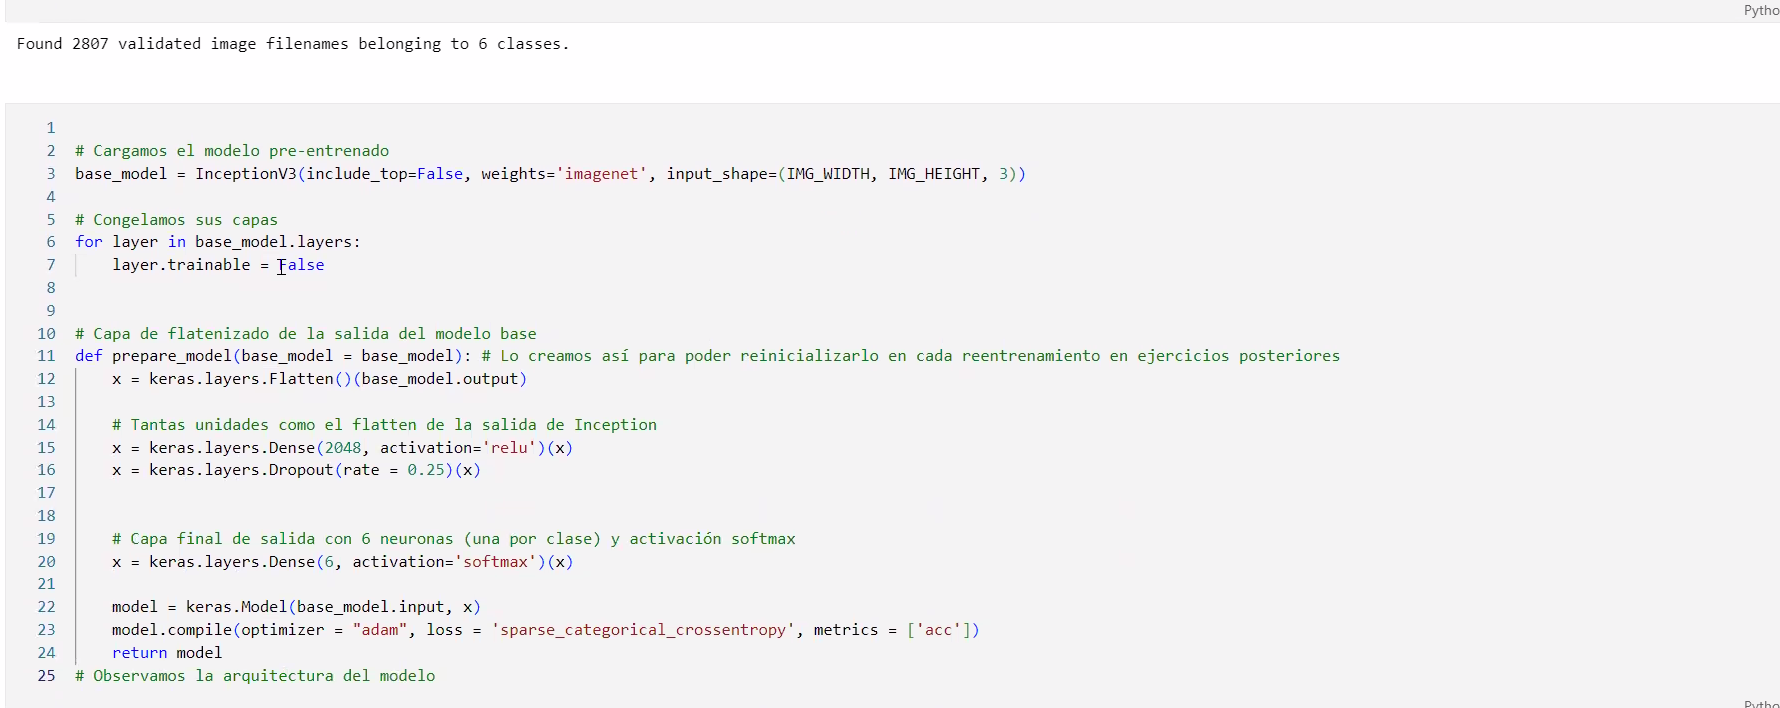

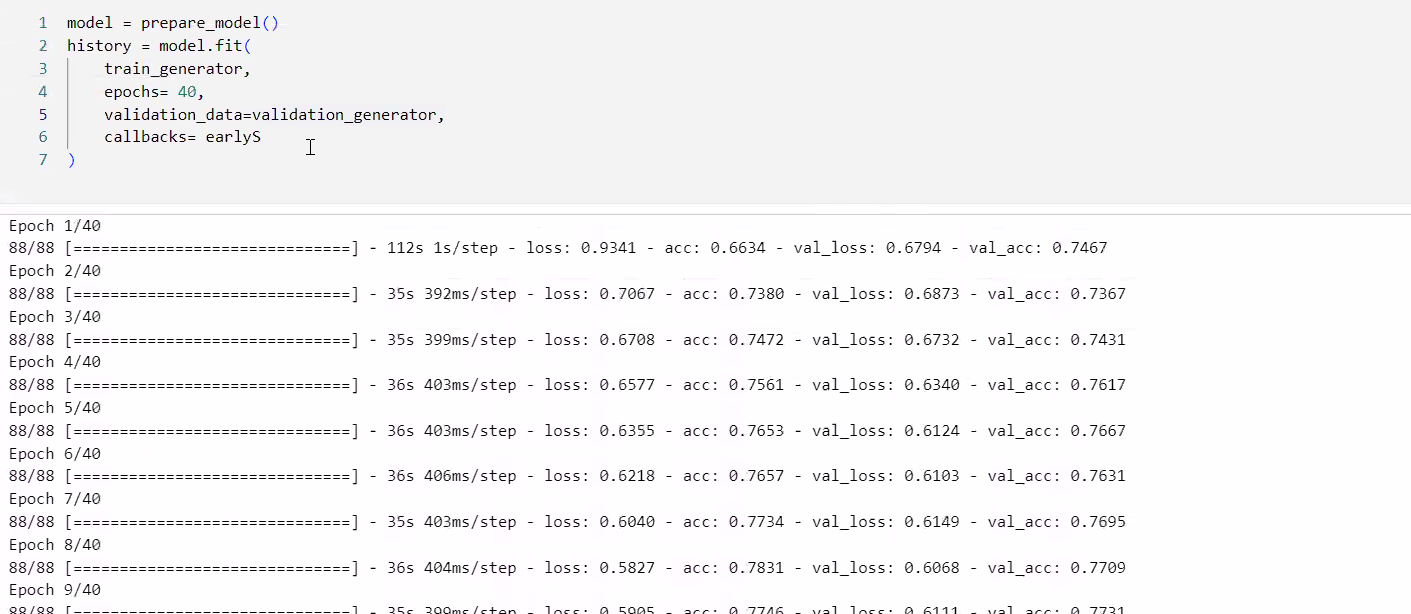

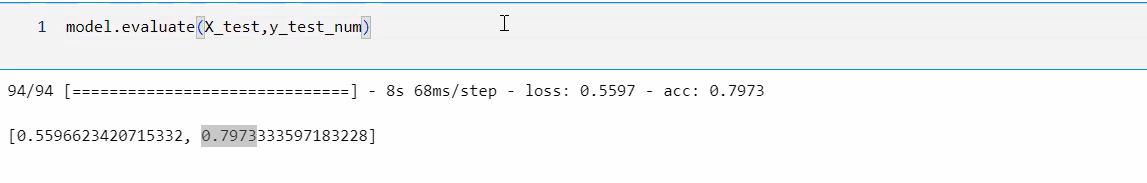